# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data preprocessing and feature engineering by 
    - removing missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html);
    - and reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

### Import libraries

In [1]:
#!pip uninstall imbalanced-learn
#!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection #Split into traing and test set
from sklearn.compose import ColumnTransformer #Column transformer object
from sklearn.preprocessing import StandardScaler #Standard scaler for Column transfer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import imblearn
import sklearn.svm
import sklearn.metrics


### Import datasets

In [3]:
adult_df = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/adult.csv')
adult_df.head()
#print(adult_df.shape)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Split into training and testing

In [4]:
df_train, df_test = sklearn.model_selection.train_test_split(adult_df)

### Conduct preprocessing and feauture Engineering
Only from the x dataset (feauture vectors)

Remove missing values (explicit and implicit)
For explicit we count missing values
For implicit we create histograms to explore the data

In [5]:
print(adult_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')


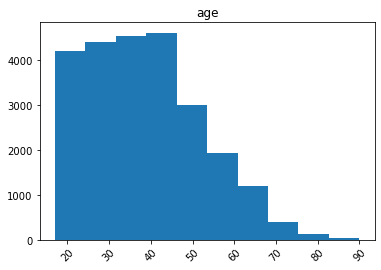

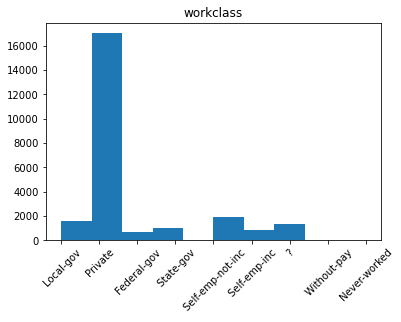

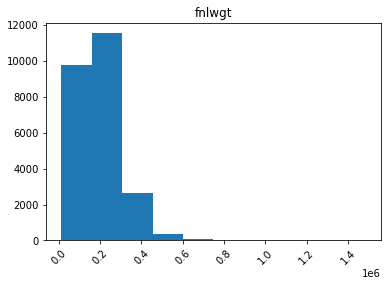

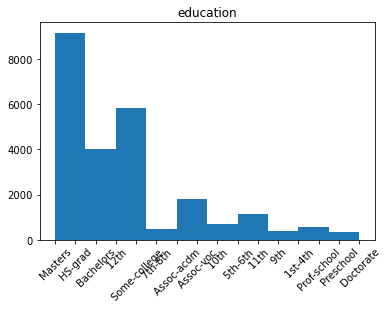

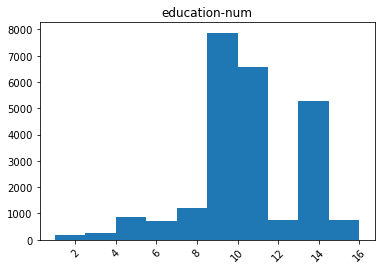

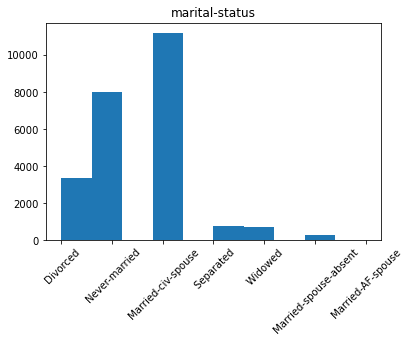

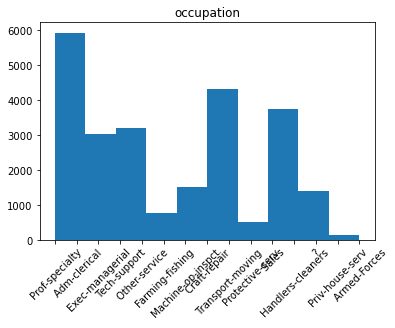

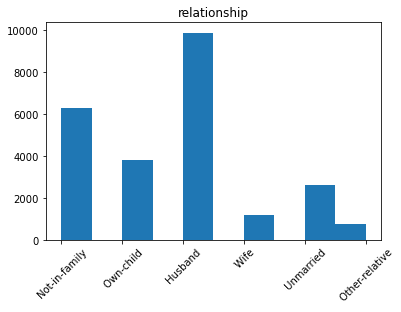

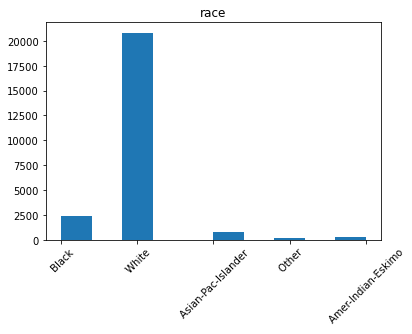

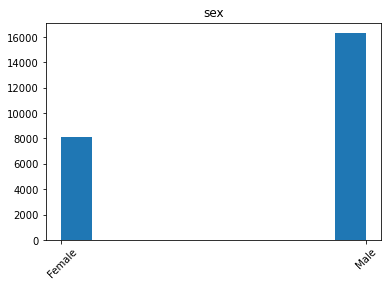

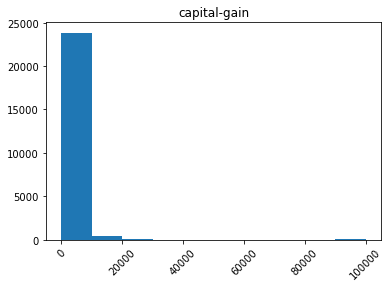

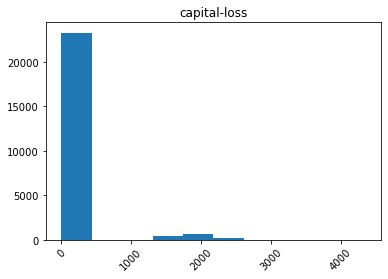

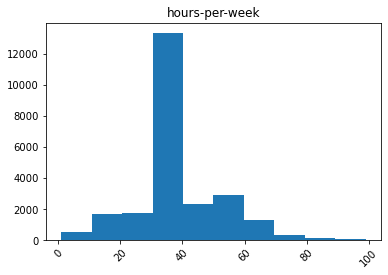

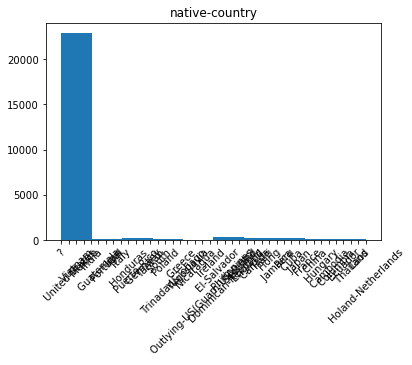

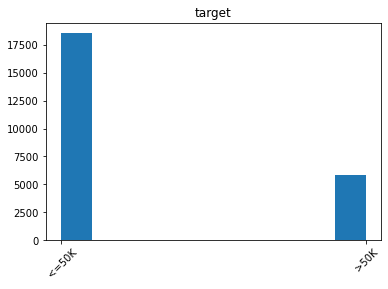

In [6]:
df_missing_values_count = df_train.isnull().sum() #There are not explicit missing values
#df_missing_values_count

for col_name in df_train.columns:
    plt.hist(df_train[col_name])
    plt.title(col_name)
    plt.xticks(rotation=45)
    plt.show()

We evaluate the columns that didn't make sense to find the columns with missing values

In [7]:
#df_train['workclass'].value_counts()
#df_train['occupation'].value_counts()
#df_train['native-country'].value_counts()

Convert and drop the missing values

Numpy library uses Np.Nan to represent missing values

In [8]:
df_train = df_train.replace(' ?', pd.NaT)
df_train = df_train.dropna()

df_test = df_test.replace(' ?', pd.NaT)
df_test = df_test.dropna()

print('df_train_set', df_train.shape)
print('df_test_set', df_test.shape)

df_train_set (22610, 15)
df_test_set (7552, 15)


Check balance of target label

In [9]:
df_train['target'].value_counts()

 <=50K    16983
 >50K      5627
Name: target, dtype: int64

Separate the feautures from the target label in both datasets

In [10]:
x_train = df_train.drop(['target'], axis = 1)
y_train = df_train['target']

x_test = df_test.drop(['target'], axis = 1)
y_test = df_test['target']

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (22610, 14)
y_train (22610,)
x_test (7552, 14)
y_test (7552,)


Use Column transfer to encode categorical variables and standard-scale numerical variables

In [11]:
ct = ColumnTransformer(transformers=[
                                    ('cat', OneHotEncoder(), ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']),
                                    ('num', StandardScaler(), ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
                                    ])

x_train_encoded = ct.fit(x_train) #use the ct object with the one hot encoder and standard scaler code to x_train

x_train_encoded = ct.transform(x_train) #use the ct object with the one hot encoder and standard scaler code to x_test
x_test_encoded = ct.transform(x_test)

print('x_train_encoded', x_train_encoded.shape)
print('x_test_encoded', x_test_encoded.shape)

x_train_encoded (22610, 104)
x_test_encoded (7552, 104)


In [12]:
type(x_train_encoded)

scipy.sparse.csr.csr_matrix

Use One Hot Encoder for categorical variables (According to ChatGPT example)

In [13]:
#encoder = OneHotEncoder()
#encoder.fit(x_train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
#encoded_x_train = encoder.transform(x_train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])


#encoder.fit(x_test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
#encoded_x_test = encoder.transform(x_test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])

#print('encoded_x_train', encoded_x_train.shape)
#print('encoded_x_test', encoded_x_test.shape)


Use One Hot Encoder for categorical variables (According to ML Class)

In [14]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(x_train)

#x_train = enc.transform(x_train)
#x_test = enc.transform(x_test)

#print('x_train', x_train.shape)
#print('x_test', x_test.shape)


Standarization with Standard Scaler

In [15]:
#scaler = StandardScaler(with_mean=False)
#scaler.fit(x_train)

#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

#print('x_train', x_train.shape)
#print('x_test', x_test.shape)

Dimensionality reduction using PCA

In [16]:
pca = PCA(n_components=60)
pca.fit(x_train_encoded.toarray())

x_train = pca.transform(x_train_encoded.toarray())
x_test = pca.transform(x_test_encoded.toarray())

print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (22610, 60)
x_test (7552, 60)


Use oversampling to balance the target label

In [17]:
sm = imblearn.over_sampling.SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
y_train.value_counts()

 <=50K    16983
 >50K     16983
Name: target, dtype: int64

Train SVM model

In [18]:
model = sklearn.svm.SVC(C=10, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=10)

Test model

In [19]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.811573093220339
